# Apply K-means algorithm to both image value and its spatial domain

For a given input image (either gray or color), apply a K-means algorithm that is designed to take into consideration of both the image intensity and its spatial domain with varying parameters: the number of clusters and the trade-off between the intensity energy and the spatial energy.

The objective function is given by:

$$\sum_k \sum_{x\in I(k)} [ \| f(x) - m_k \|^2 + a * \| x - c_k \|^2 ]$$

where $I(k)$ denotes the index set of x that belongs to cluster k, $m_k$ denotes the centroid of image intensity for cluster k, $c_k$ denotes the centroid of spatial location for cluster k, and a determines the importance between the image intensity and the spatial relation.

<br>

# Visualize the clustering results and the energy curve

- Visualize the clustering results with varying k and a using the centroid color $m_k$ for each cluster k. $(k = 2, 5, 10, \ a = 0.01, 0.1, 1)$

- Visualize the energy curve for both the intensity energy and the spatial energy.


## k = 2

### a = 0.01

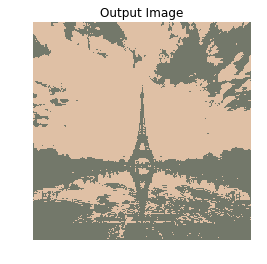

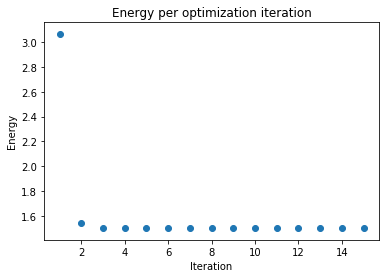

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import *
from collections import Counter
from math import sqrt

#
# load and reshape the image & Domain of pixels
#
in_img = cv2.imread('Photo.jpg')                      # img.shape = (300, 300, 3)
img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)
img = img.reshape((img.shape[0] * img.shape[1], 3))   # img.shape = (90000, 3)
num_image = img.shape[0]

mean = np.mean(img, axis = 0)
std = np.std(img, axis = 0)
whitening_img = (img - mean) / std
image = np.empty((90000,5),dtype = float)
image[:,:3] = whitening_img
for i in range(300):
    for j in range(300):
        image[j+i*300,3] = i/299                # index of x
        image[j+i*300,4] = j/299                # index of y



#
# Distance function between two vectors x and y (L2-norm)
#

def distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    return(s)



#
# k-mean fuction
#

def getCentroids(image, labels, k):
    idx = np.argsort(labels)
    labels = labels[idx]
    image = image[idx,:]

    label_count = [0,]
    result = Counter(labels)
    for i in range(k):
        label_count.append(result[i])
    label_cumsum = []
    cumsum = 0
    for i in range(k+1): 
        cumsum += label_count[i]
        label_cumsum.append(cumsum)
    centroids = np.empty((k,5), dtype=float)
    
    for i in range(k):
        centroids[i,:] = np.sum(image[label_cumsum[i]:label_cumsum[i+1],:], axis=0) / label_count[i+1]
    return centroids

def getLabelsAndEnergy(image, centroids, k,a):
    labels  = np.empty(num_image, dtype=int)
    energy = 0
    for i in range(num_image):
        d = []
        for j in range(k):
            d.append(distance(image[i,:], centroids[j,:]))
        labels[i] = np.argmin(d)
        energy += np.min(d)/num_image
    return labels, energy



#
# K-means clustering
#

k = 2
a = 0.01

image[:,4:5] = a*image[:,4:5]
labels  = np.empty(num_image, dtype=int)
for i in range(num_image):
    labels[i] = randint(0,k-1)      # Initialization of label
iterations = 0
energies = []
centroids = None
oldCentroids = 0
while not np.all(oldCentroids == centroids):
    oldCentroids = centroids
    iterations += 1

    # Assign centroids based on datapoint labels
    centroids = getCentroids(image, labels, k)
        
    # Assign labels to each datapoint based on centroids and compute energies
    labels, energy = getLabelsAndEnergy(image, centroids, k, a)
    energies.append(energy)

# Output image
out_img = np.empty((num_image,3), dtype=int)
for i in range(num_image):
    out_img[i,:] = centroids[labels[i],:3] * std + mean     
out_img = out_img.reshape((300, 300, 3))
f1 = plt.figure()
plt.title('Output Image')
plt.imshow(out_img, cmap = plt.cm.gray)
plt.axis("off")
plt.show()

# Energy Graph
x_axis = range(1,iterations+1)
y_axis = energies
f2 = plt.figure()
plt.title('Energy per optimization iteration')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.scatter(x_axis, y_axis)
plt.show()


### a = 0.1

In the above code, only changed a value from 0.01 to 0.1, and saved the image.

![Output_Image](image_07/Output_Image_k2_a0.1.png)
![Energy](image_07/Energy_k2_a0.1.png)

### a = 1

![Output_Image](image_07/Output_Image_k2_a1.png)
![Energy](image_07/Energy_k2_a1.png)

## k = 5

### a = 0.01

![Output_Image](image_07/Output_Image_k5_a0.01.png)
![Energy](image_07/Energy_k5_a0.01.png)

### a = 0.1

![Output_Image](image_07/Output_Image_k5_a0.1.png)
![Energy](image_07/Energy_k5_a0.1.png)

### a = 1

![Output_Image](image_07/Output_Image_k5_a1.png)
![Energy](image_07/Energy_k5_a1.png)

## k = 10

### a = 0.01

![Output_Image](image_07/Output_Image_k10_a0.01.png)
![Energy](image_07/Energy_k10_a0.01.png)

### a = 0.1

![Output_Image](image_07/Output_Image_k10_a0.1.png)
![Energy](image_07/Energy_k10_a0.1.png)

### a = 1

![Output_Image](image_07/Output_Image_k10_a1.png)
![Energy](image_07/Energy_k10_a1.png)